## Subject Area
##### This data set consists of Placement data of students in our campus. It includes ,
1. secondary and higher secondary school percentage and specialization.
2. degree specialization, type and Work experience and salary offers to the placed students

## Task: 
##### Supervised Machine Learning > Classification (binary) Problem

## Metrics: 
##### LogLoss, Accuracy, ROC-AUC, Presicion, Recall, F1-Score

## Description About Data:
This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

Source: https://www.kaggle.com/benroshan/factors-affecting-campus-placement or

https://www.kaggle.com/c/ml-with-python-course-project/data

Attribute Information:
sl_no Serial Number

gender Gender- Male='M',Female='F'(male=0, female=1)

ssc_p Secondary Education percentage- 10th Grade

ssc_b Board of Education- Central/ Others

hsc_p Higher Secondary Education percentage- 12th Grade

hsc_b Board of Education- Central/ Others

hsc_s Specialization in Higher Secondary Education

degree_p Degree Percentage

degree_t Under Graduation(Degree type)- Field of degree education

workex Work Experience

etest_p Employability test percentage ( conducted by college)

specialisation Post Graduation(MBA)- Specialization

mba_p MBA percentage

status Status of placement- Placed/Not placed

salary Salary offered by corporate to candidates



## Topics to cover:
1. Importing Libraries
2. Importing Dataset
3. Basic Questions to Ask from Data
4. Data Cleaning
5. Exploratory Data Analysis (EDA)
6. Preprocessing or Feature Engineering
7. Model Building
8. Hyperparameter Tunning

## 1. Importing Dependencies/Libraries

#### Data and Analysis

In [1]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats
from scipy.stats import norm

#### Visualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### ML Libraries

In [4]:
from sklearn import metrics
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

## 2. Data Importing

In [5]:
#load the training data
df=pd.read_csv('Placement_Data_Full_Class.csv')
#first 5 rows
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## 3. Basic Questions To Ask From Data?
1. How does data looks like?
2. What is size of Data?
3. What are the features in data?
4. Basic infromation about data (null values and data types)
5. Duplicate values(rows) in data
6. Statistical Description about Data
7. Correlation among features
8. Unique number of values in a particular feature

##### 1. How does data looks like?

In [6]:
#How does data looks like? /sample 5 rows
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
200,201,M,69.00,Others,60.00,Others,Commerce,65.00,Comm&Mgmt,No,87.55,Mkt&Fin,52.81,Placed,300000.0
143,144,M,77.67,Others,64.89,Others,Commerce,70.67,Comm&Mgmt,No,89.00,Mkt&Fin,60.39,Placed,300000.0
43,44,M,87.00,Others,87.00,Others,Commerce,68.00,Comm&Mgmt,No,95.00,Mkt&HR,62.90,Placed,300000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN
152,153,F,75.40,Others,60.50,Central,Science,84.00,Sci&Tech,No,98.00,Mkt&Fin,65.25,Placed,240000.0


##### 2. What is size of Data?

In [7]:
#What is size of Data? /shape of data
df.shape
#Observation-->rows=215, columns=15

(215, 15)

**we don't have much data!**

##### 3. What are the features in data?

In [8]:
#What are the features in data? /names of columns
df.columns
#Observation-->Column names aren't understandable, will change in data cleaning

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

##### 4. Basic infromation about data (null values and data types)

In [9]:
#basic information about data
df.info()
#Observation-->some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
#percent of null values
np.round((df.isnull().sum()/df.shape[0])*100, 2)
#Observation-->Salary column seems to have 30% null values, will handle missing values in Feuture Engineering

sl_no              0.00
gender             0.00
ssc_p              0.00
ssc_b              0.00
hsc_p              0.00
hsc_b              0.00
hsc_s              0.00
degree_p           0.00
degree_t           0.00
workex             0.00
etest_p            0.00
specialisation     0.00
mba_p              0.00
status             0.00
salary            31.16
dtype: float64

##### 5. Duplicate values(rows) in data

In [11]:
#duplicates
df.duplicated().sum()
#Observation-->no duplicates in data

0

##### 6. Statistical Description about Data

In [12]:
#Statistical Description(only for numerical features)
df.describe()
#Observation-->Salary column seems to have right outliers and missing values

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


##### 7. Correlation among features

In [13]:
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


##### 8. Unique number of values in a particular feature

In [14]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

## 4. Data Exploration & Cleaning

##### Map Placed=1  & Not Placed=0

In [15]:
#'Placed': 1, 'Not Placed': 0
df['status01'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

##### Changing names of columns

In [16]:
#change Names(rename) of Columns
df.rename(columns={'sl_no':'S.No.', 'gender':'Gender', 'ssc_p':'10th%', 'ssc_b':'10th_board', 'hsc_p':'12th%', 'hsc_b':'12th_board', 
 'hsc_s':'12th_specialization', 'degree_p':'graduation%', 'degree_t':'graduation_deg', 'workex':'Work_experience',
 'etest_p':'Employee_test%', 'specialisation':'MBA_specialization', 'mba_p':'MBA%', 'status':'Placed/Not','status01':'status01', 'salary':'Salary'},
          inplace=True)

In [17]:
#New Column names
df.columns

Index(['S.No.', 'Gender', '10th%', '10th_board', '12th%', '12th_board',
       '12th_specialization', 'graduation%', 'graduation_deg',
       'Work_experience', 'Employee_test%', 'MBA_specialization', 'MBA%',
       'Placed/Not', 'Salary', 'status01'],
      dtype='object')

##### Categoriacal & Numerical Features

In [18]:
#Categorical Features
cat_fea=['Gender', '10th_board', '12th_board', '12th_specialization', 'graduation_deg', 'Work_experience', 'MBA_specialization', 'Placed/Not']
#Numerical Features
num_fea=['10th%', '12th%', 'graduation%', 'Employee_test%', 'MBA%', 'Salary']

##### Value Counts 

In [19]:
#percent of all categories in categorical feature 
for fea in cat_fea:
    print(f'{fea}\n{(df[fea].value_counts()/df.shape[0])*100}\n')
#Observation-->Imbalanced 'Gender','12th_board','12th_specialization'(Arts),'graduation_deg'(Others),'Work_experience','Placed/Not'
#Observation-->Approximately balanced Data on '10th_board', 'MBA_specialization'

Gender
M    64.651163
F    35.348837
Name: Gender, dtype: float64

10th_board
Central    53.953488
Others     46.046512
Name: 10th_board, dtype: float64

12th_board
Others     60.930233
Central    39.069767
Name: 12th_board, dtype: float64

12th_specialization
Commerce    52.558140
Science     42.325581
Arts         5.116279
Name: 12th_specialization, dtype: float64

graduation_deg
Comm&Mgmt    67.441860
Sci&Tech     27.441860
Others        5.116279
Name: graduation_deg, dtype: float64

Work_experience
No     65.581395
Yes    34.418605
Name: Work_experience, dtype: float64

MBA_specialization
Mkt&Fin    55.813953
Mkt&HR     44.186047
Name: MBA_specialization, dtype: float64

Placed/Not
Placed        68.837209
Not Placed    31.162791
Name: Placed/Not, dtype: float64



## 5. Exploratory Data Analysis (EDA)
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

### 1. UNIVARIATE Analysis

##### 1.1 Non-Missing values

In [20]:
mis_color = []

for col in df.columns:
    if df[col].isna().sum() != 0:
        mis_color.append('#36FFF5')
    else:
        mis_color.append('gray')

Text(0.5, 1.15, 'Non-Missing Values (BEFORE)')

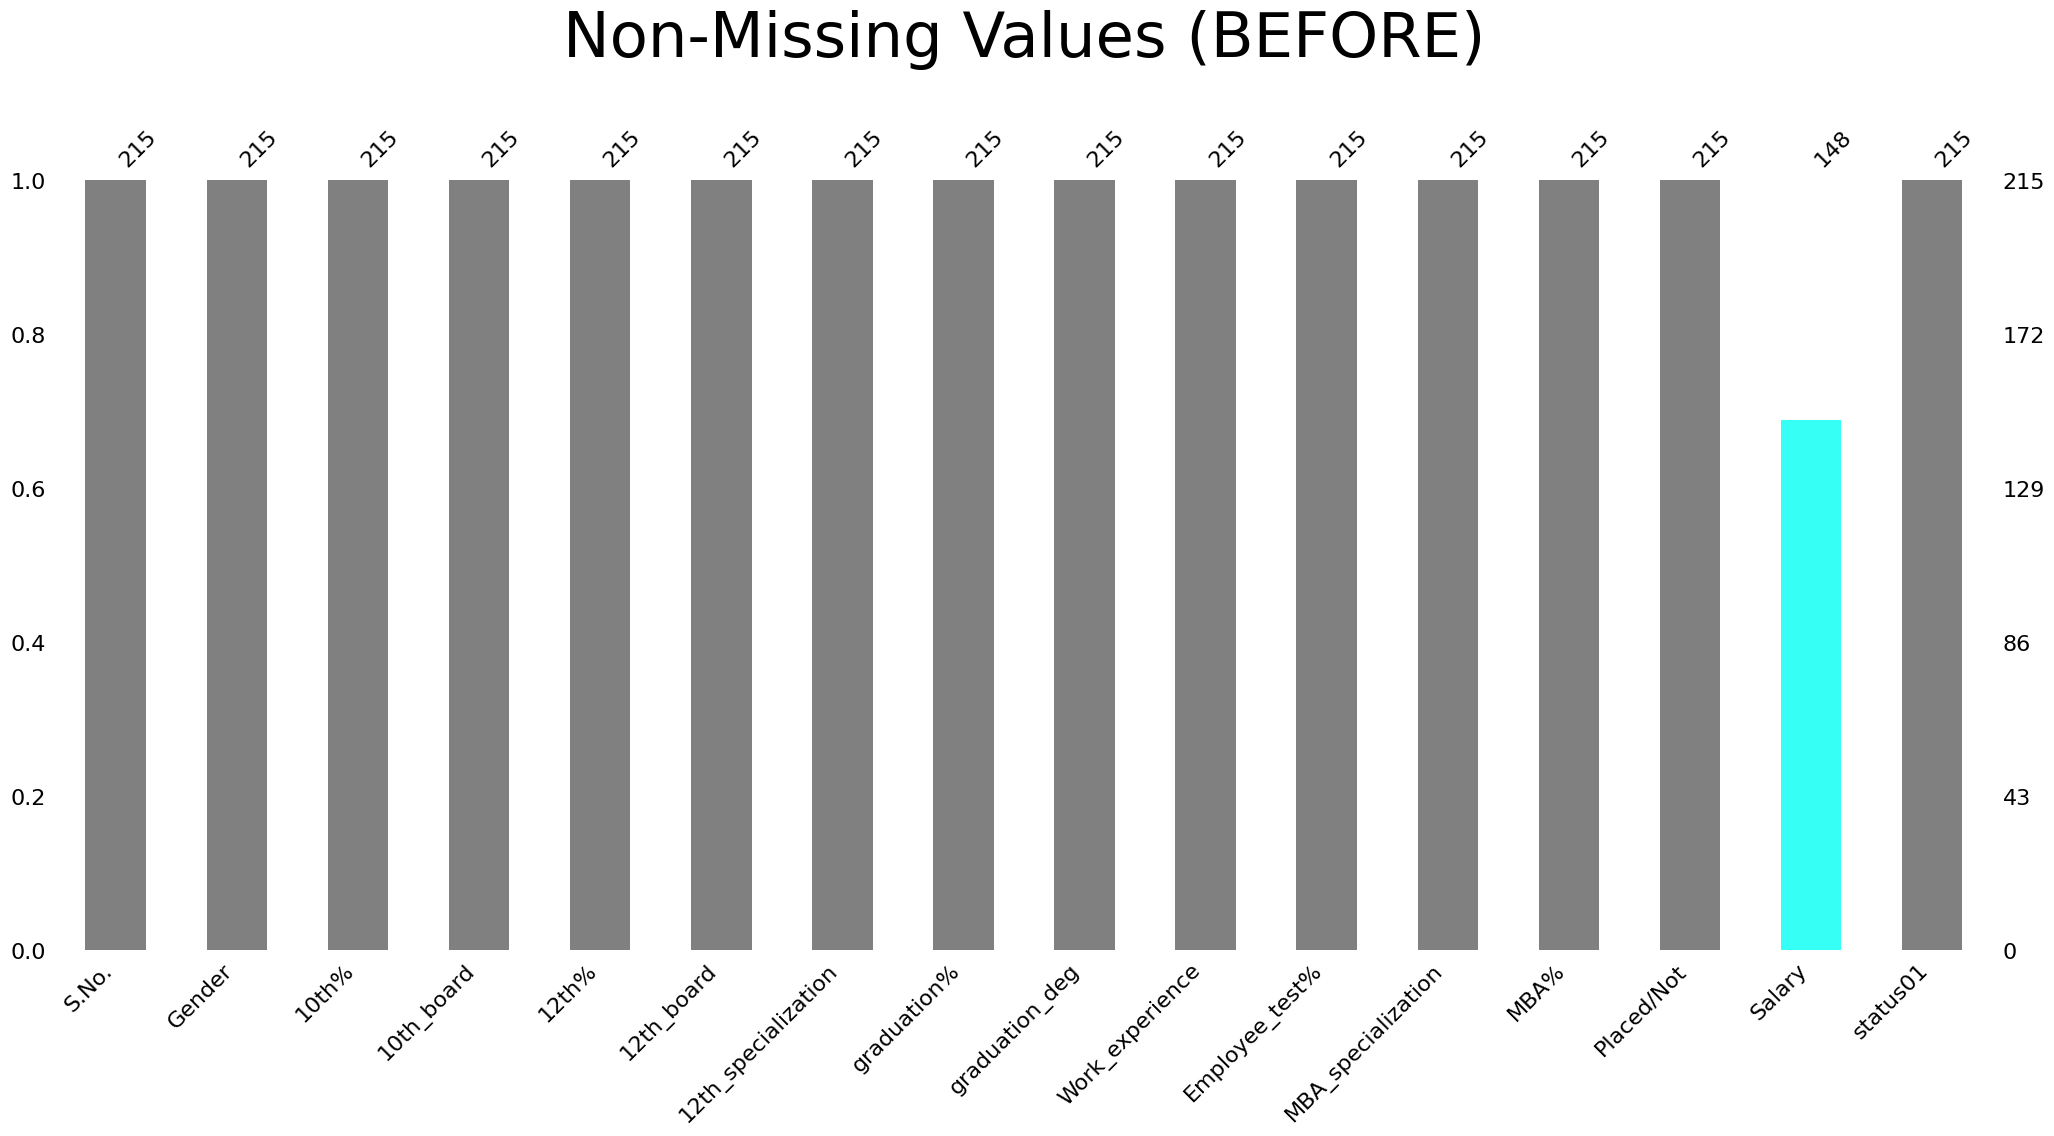

In [21]:
msn.bar(df, color=mis_color)
plt.title('Non-Missing Values (BEFORE)', size=45, y=1.15)
#Observation-->Some missing values in 'Salary'

##### 1.2 Salary Distribution(Kernel Density Estimator - KDE Plot)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

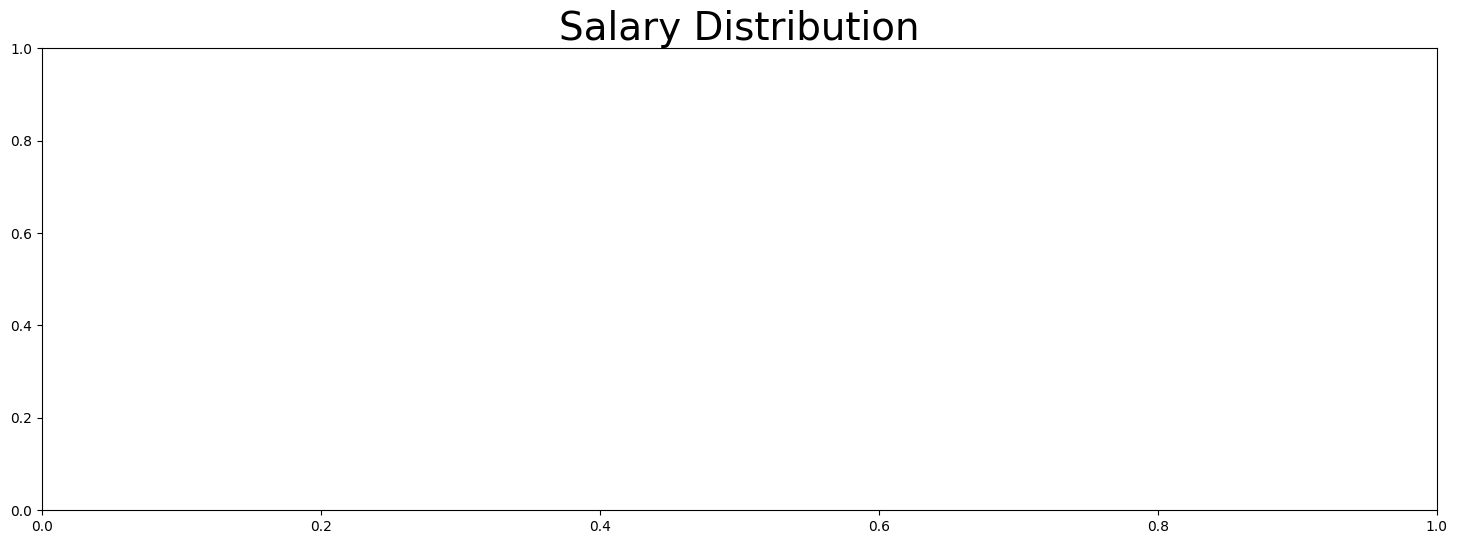

In [22]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Salary Distribution', size=28)

# Since there are many NaN values in Salary feature, so Data without NaN values in salary column
temp_df = df.copy()
temp_df = temp_df.dropna()

# plots
sns.kdeplot(data=temp_df,x='Salary', shade=True, ax=ax, color='orange', alpha=1)
plt.xlabel('Salary')
plt.ylabel('probability Density')

#Observation-->We have Right Skewed distribution. It’s worth noting that we don’t have much data

In [ ]:
#Most frequent Salary
temp_df['Salary'].mode().iloc[0]

##### 1.3 Placed/Not ratio

In [ ]:
# pie chart for Placed/Not

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Distribution of Predicted Values (Placements)', size=28)

explode = [0, 0.1]
values=df['Placed/Not'].value_counts()
labels=df['Placed/Not'].unique().tolist()
plt.pie(values, labels=labels, explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()
print(values)

##### 1.4 Gender ratio

In [ ]:
sns.countplot(df['Gender'])

##### 1.5  Work Experience Ratio

In [ ]:
# pie chart for Work Experience

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Ratio of Work Experience', size=28)

explode = [0, 0.1]
values=df['Work_experience'].value_counts()
labels=df['Work_experience'].unique().tolist()
plt.pie(values, labels=labels, explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()
print(values)

### 2. BIVARIATE Analysis

##### 2.1 Salary Vs Placement

In [ ]:
#Status of Placed/Not wrt NaN Salary
df[['Placed/Not', 'Salary']][np.isnan(df.Salary)]

**If we look at Salary of students Not got placed, it becomes clearer that all the students who haven't got Placed have 0 salary**

**In this case, we can replace the missing values with a variable of "0", but then we will have a direct link with the predicted status, so you should delete this column¶**

In [ ]:
#drop Salary and S.No.(as its of no use)
df=df.drop(['Salary', 'S.No.'], axis=1)
#sample row of df
df.sample()

In [ ]:
df.columns

##### 2.2 Count of Placements for Male and Female

In [ ]:
#    
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.title('Count of Placements', size=28)

sns.countplot(x='Placed/Not',data=df,hue='Gender', palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Not Placed', 'Placed'], size=25)
plt.show()

##### 2.3 Gender influence on Placement 

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.title('Count of Placements', size=28)

sns.barplot(y='status01',x='Gender', data=df, hue='Gender', palette=['blue', 'orange'], orient='v')

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Placed', 'Not Placed'], size=25)
plt.show()

#### 2.4 Secondary Education (Class 10th)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of 10th Board', size=28)

sns.countplot(x='10th_board',data=df, palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Others', 'Central'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.title('Class 10th board influence on Placements', size=28)

sns.barplot(y='status01',x='10th_board', data=df, palette=['blue', 'orange'], orient='v')

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Others', 'Central'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By 10th Percentage', size=28)

ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='10th%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='10th%', shade=True, ax=ax, color='blue', alpha=0.7)

plt.xlabel("10th Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})
plt.show()

#### 2.5 Senior Secondary Education (Class 12th)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of 12th Board', size=28)

sns.countplot(x='12th_board',data=df, palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Others', 'Central'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.title('Class 12th board influence on Placements', size=28)

sns.barplot(y='status01',x='12th_board', data=df, palette=['blue', 'orange'], orient='v')

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Others', 'Central'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of 12th Board Specialization', size=28)

sns.countplot(x='12th_specialization',data=df, palette=['blue', 'orange', 'gray'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Commerce', 'Science', 'Arts'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.title('Class 12th specialization influence on Placements', size=28)

sns.barplot(y='status01',x='12th_specialization', data=df, palette=['blue', 'orange', 'gray'], orient='v')

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Commerce', 'Science', 'Arts'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By 12th Percentage', size=28)

ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(35, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='12th%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='12th%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("12th Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

#### 2.6 Graduation

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of Graduation Degrees', size=28)

sns.countplot(x='graduation_deg',data=df, palette=['blue', 'orange', 'gray'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Sci & Tech', 'Comm & Mang', 'Others'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
plt.title('Graduation Degree influence on Placements', size=28)

sns.barplot(y='status01',x='graduation_deg', data=df, palette=['blue', 'orange', 'gray'], orient='v')

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Sci & Tech', 'Comm & Mang', 'Others'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By Graduation Percentage', size=28)

ax.text(85, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(45, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='graduation%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='graduation%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("Graduation Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

#### 2.7 Post-Graduation (MBA)

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.title('Count of MBA Specialization', size=28)

sns.countplot(x='MBA_specialization',data=df, palette=['blue', 'orange'])

ax.set(xlabel=None, ylabel=None)
ax.set_xticklabels(['Marketing & HR', 'Marketing & Finance'], size=25)
plt.show()

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By MBA Percentage', size=28)

ax.text(75, 0.03, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(45, 0.03, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='MBA%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='MBA%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("MBA Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

#### 2.8 Employee test

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Placement Distribution By Employee Test Percentage', size=28)

ax.text(95, 0.02, 'Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'orange'}, alpha=0.9)
ax.text(35, 0.02, 'Not Placed', {'fontproperties': 'Serif','size': '20','weight': 'bold','color': 'blue'}, alpha=0.9)

sns.kdeplot(data=df[df['Placed/Not']=='Placed'], x='Employee_test%', shade=True, ax=ax, color='orange', alpha=1)
sns.kdeplot(data=df[df['Placed/Not']!='Placed'], x='Employee_test%', shade=True, ax=ax, color='blue', alpha=0.7)
plt.xlabel("Employee Test Percentage", {'fontproperties': 'Serif','size': '25','weight': 'bold'})

plt.show()

### 3. Multivariate Analysis

##### 3.1 Pairplot(relation of all the features with all others)

In [ ]:
#all with with

sns.pairplot(df)

**Observation-->features doesn't seems to have much outliers**

#### 3.2 heatmap (to check collinearity and multicollinearity)

In [ ]:
#'Placed': 1, 'Not Placed': 0
df['Placed/Not'] = df['Placed/Not'].map({'Placed': 1, 'Not Placed': 0})
df.drop(['status01'], axis=1, inplace=True)

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)
plt.title('Heatmap showing collinearity & multicollinearity', size=28)

sns.heatmap(df.corr(), annot=True)

**Observation-->we can clearly see 10th% is most correlated with placements as compared to other class percentages, and employee test% & MBA% have not much weightage on placements. Apart from that feature doesn't seems to have multicollinearity.**

In [ ]:
# as we can see, MBA% is not that much correlated with our data we are going to drop it
df.drop("MBA%",axis=1,inplace=True)

## 6. Feature Engineering / Preprocessing
1. Feature Encoding
2. Feature Scaling
3. Handling Missing Values(No missing values are there...)
4. Handling Outliers

In [ ]:
df.columns

#### Dividing Data into dependent & independent variables

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X)
print(y)

#### Splitting data into train-test
Its better to split data into train and test to overcome data leakage problem...

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'X_train:{X_train.shape}, y_train:{y_train.shape}, X_test:{X_test.shape}, y_test:{y_test.shape}')

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train

In [ ]:
y_test

#### Column Transformer & pipeline creation

In [ ]:
# import required libraries for Feature Encoding(Nominal) and scaling
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# object of Column Transformer for Encoding 
ct = ColumnTransformer([
  ("trf1",OneHotEncoder(sparse=False,drop='first'),['Gender','10th_board','12th_board','12th_specialization',
                                                    'graduation_deg','Work_experience','MBA_specialization']),],
    remainder='passthrough')

# Create pipeline for data preparation
pipe = Pipeline(steps=[
      ('trf1',ct),
      ('trf2',StandardScaler())
])


X_train_trf = pipe.fit_transform(X_train)
X_test_trf = pipe.transform(X_test)
X_trf = pipe.transform(X)

In [ ]:
#data are transfromation
print(X_train_trf, X_test_trf, y_train, y_test)

In [ ]:
#shape of data are transfromation
print(X_train_trf.shape, X_test_trf.shape, y_train.shape, y_test.shape)

## 7. Model Training
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree Classifier
4. Random Forest

In [ ]:
import sklearn
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

model_list = [("lr",LogisticRegression()),
              ("dt",DecisionTreeClassifier()),
              ("rf",RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=30)),
              ("svm",SVC())]

# accuracy score on train dataset for all models  
for model_name,model in model_list:
    m = model.fit(X_train_trf,y_train)
    y_pred = model.predict(X_train_trf)
    print(f'{model_name} : {accuracy_score(y_train,y_pred)}')

In [ ]:
# accuracy score on test dataset for all models  
for model_name,model in model_list:
    m = model.fit(X_train_trf,y_train)
    y_pred = model.predict(X_test_trf)
    print(f'{model_name} : {accuracy_score(y_test,y_pred)}')

###### SVM

In [ ]:
confusion_matrix(y_test, y_pred)
#TP=11, FP=2, FN=5, TN=25

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)
#TP/(TP+FP)-->focuses on FP

In [ ]:
recall_score(y_test, y_pred)
#TP/(TP+FN)-->focusses on FN

In [ ]:
f1_score(y_test, y_pred)
#if both FP and FN are equally important

### 8. Hyperparameter Tunning

In [ ]:
algos = {
    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,20,30,40],
            'criterion':['gini','entropy'],
            'max_depth':[10,20,30],
            'min_samples_split':[2,4,6]
        }
    },
    'dt':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[10,20,30],
            'splitter':['best','random'],
        }
    },
    
    'lr':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1','l2'],
            'C':[0.1,0.01,1,0.5],
            'solver':['liblinear','lbfgs']
        }
    
    },
    
    'svm':{
        'model':SVC(),
        'params':{
            'C':[0.1,0.01,1,0.5],
            'kernel':['linear','poly','rbf']
            
        }
    }
    
}

scores = []

cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

for model_name,config in algos.items():
   gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
   gd.fit(X_trf,y)
   scores.append({'model_name':model_name,'best_score':gd.best_score_,'best_params':gd.best_params_})

scores = pd.DataFrame(scores)
scores.head()

**END OF DOCUMENT**